출처: https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/

# 항체의약품의 fomulation buffer 분석하기


In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

## 데이터 불러오기

In [57]:
df = pd.read_csv('../input/CS-360_FORMOscreen_formulation.csv')
df.tail()

,Name,Code,Ingredient,Category,Conc.(mg/ml)
374,Portrazza/Necitumumab,H3,Glycine,Amino acids,9.98
375,Poteligeo/Mogamulizumab-Kpkc,H4,Glycine,Amino acids,22.50
376,Simulect/Basiliximab,H5,Glycine,Amino acids,8.00
377,Evenity/Romosozumab-Aqqg,B5,Calcium chloride,Salts,0.52
378,Hemlibra/Emicizumab-Kxwh,C5,L-Histidine,Buffer(pH),3.10


## 데이터의 갯수 파악하기

In [58]:
df.nunique()

Name             90
Code             96
Ingredient       37
Category          5
Conc.(mg/ml)    204
dtype: int64

위의 정보중 Name의 갯수를 볼때 총 90개의 항체 의약품에서 데이터가 나왔으며 fomulation에 쓰이는 시약은 37가지라는 것을 알 수 있다.

<AxesSubplot:xlabel='count', ylabel='Ingredient'>

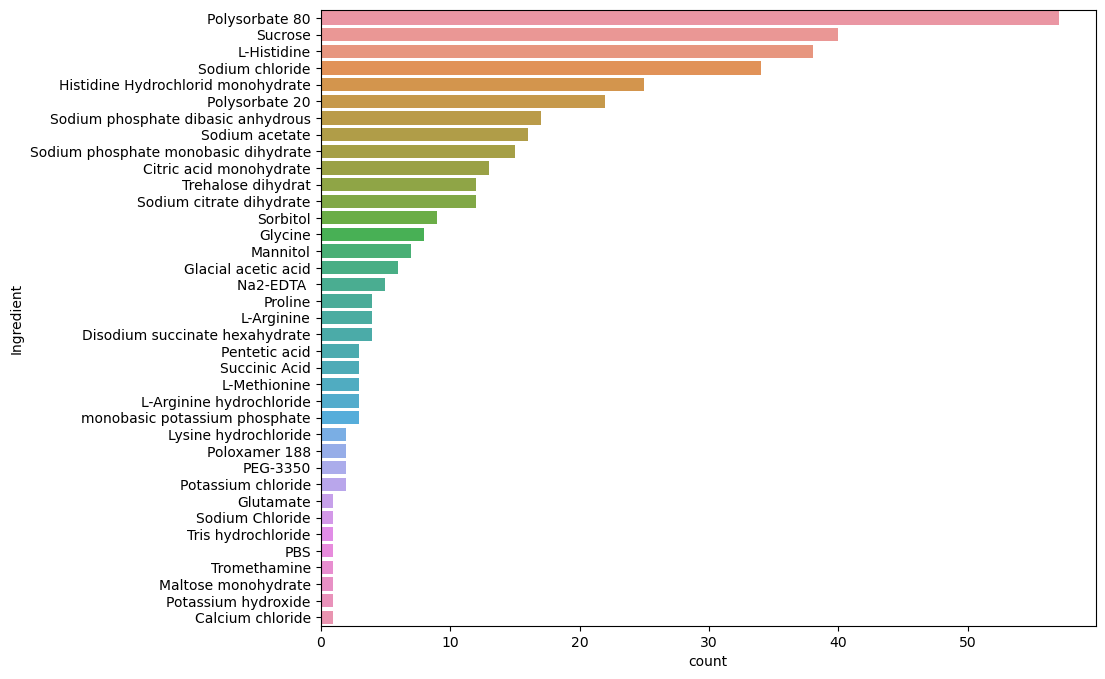

In [59]:
fig, axes = plt.subplots(figsize=(10, 8))
sns.countplot(ax=axes, data=df, y="Ingredient", order=df['Ingredient'].value_counts().index)
# sns.countplot(ax=axes[1], data=df, y="Ingredient")

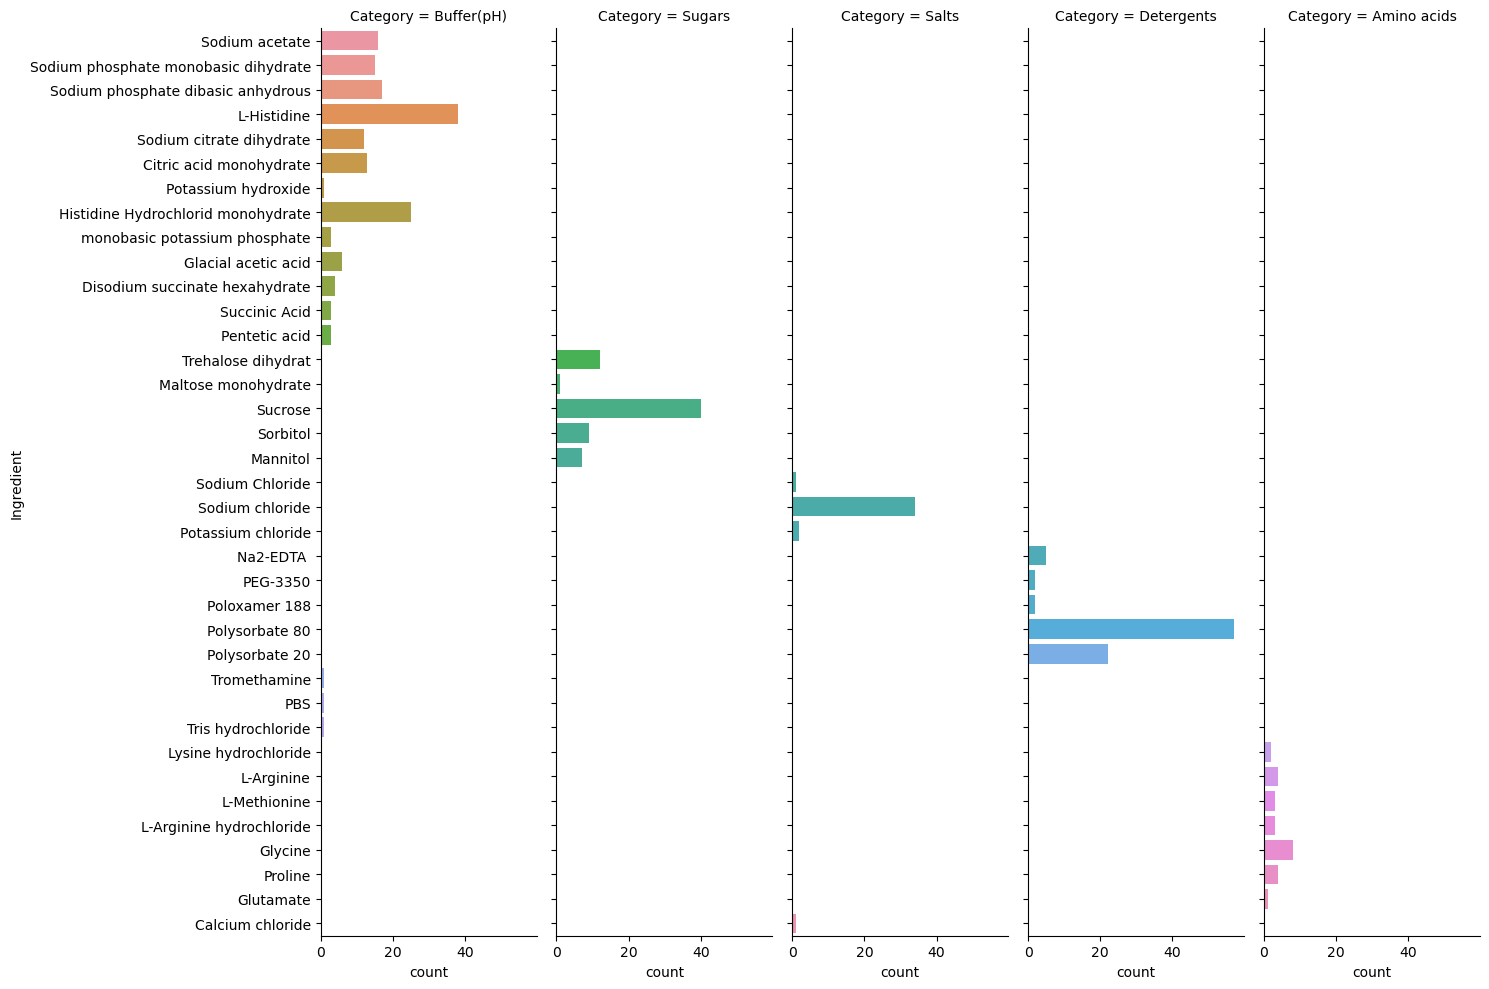

In [60]:
# fig, axes = plt.subplots(1, 1, figsize=(18, 8))
# sns.countplot(ax=axes[0], data=df, y="Ingredient", order=df['Ingredient'].value_counts().index)
# sns.countplot(ax=axes[1], data=df, y="Ingredient")
# facet = sns.FacetGrid(df, col='Category', size=7)
# facet = facet.map(plt.)

g = sns.catplot(y='Ingredient', col="Category", data=df, kind="count", height=10, aspect=.3)

가장 많이 사용되는 것?



In [61]:
df['Ingredient'].value_counts()[:10]

Polysorbate 80                          57
Sucrose                                 40
L-Histidine                             38
Sodium chloride                         34
Histidine Hydrochlorid monohydrate      25
Polysorbate 20                          22
Sodium phosphate dibasic anhydrous      17
Sodium acetate                          16
Sodium phosphate monobasic dihydrate    15
Citric acid monohydrate                 13
Name: Ingredient, dtype: int64

In [62]:
df_detergents = df[df['Category'] == 'Detergents']
df_detergents

,Name,Code,Ingredient,Category,Conc.(mg/ml)
244,Arzerra/Ofatumumab,A6,Na2-EDTA,Detergents,0.02
245,Arcalyst/Rilonacept,A8,PEG-3350,Detergents,30.00
246,Ajovy/Fremanezumab-Vfrm,B1,Na2-EDTA,Detergents,0.17
247,Campath/Alemtuzumab,B3,Na2-EDTA,Detergents,0.02
248,Hemlibra/Emicizumab-Kxwh,C5,Poloxamer 188,Detergents,0.50
...,...,...,...,...,...
327,Xolair/Omalizumab,H7,Polysorbate 20,Detergents,0.36
328,Yervoy/Ipilimumab,H8,Polysorbate 80,Detergents,0.10
329,Zenapax/Daclizumab,H9,Polysorbate 80,Detergents,0.20
330,Zinbryta/Daclizumab,H11,Polysorbate 80,Detergents,0.30


<AxesSubplot:xlabel='Conc.(mg/ml)', ylabel='Ingredient'>

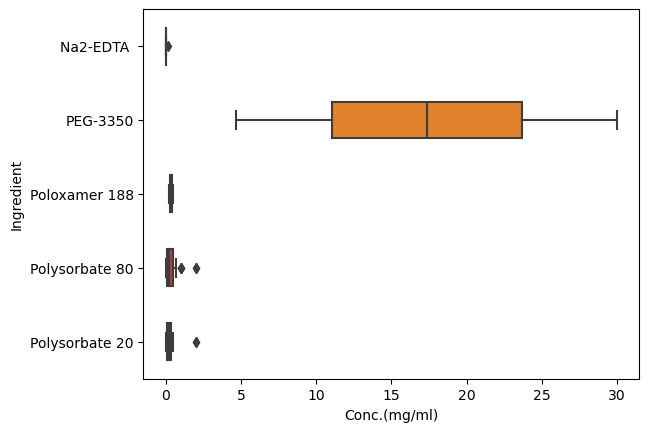

In [63]:
sns.boxplot(data=df_detergents, y='Ingredient', x='Conc.(mg/ml)', width=0.5)

<AxesSubplot:xlabel='Conc.(mg/ml)', ylabel='Ingredient'>

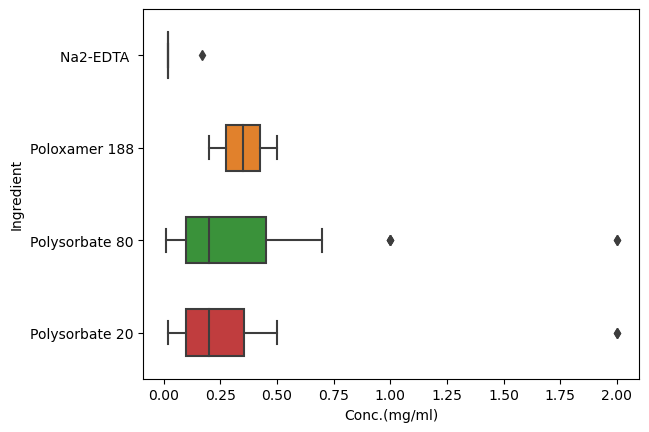

In [64]:
df_detergents = df_detergents[df_detergents['Ingredient'] != 'PEG-3350']
# df_detergents['Ingredient'].unique()
sns.boxplot(data=df_detergents, y='Ingredient', x='Conc.(mg/ml)', width=0.5)

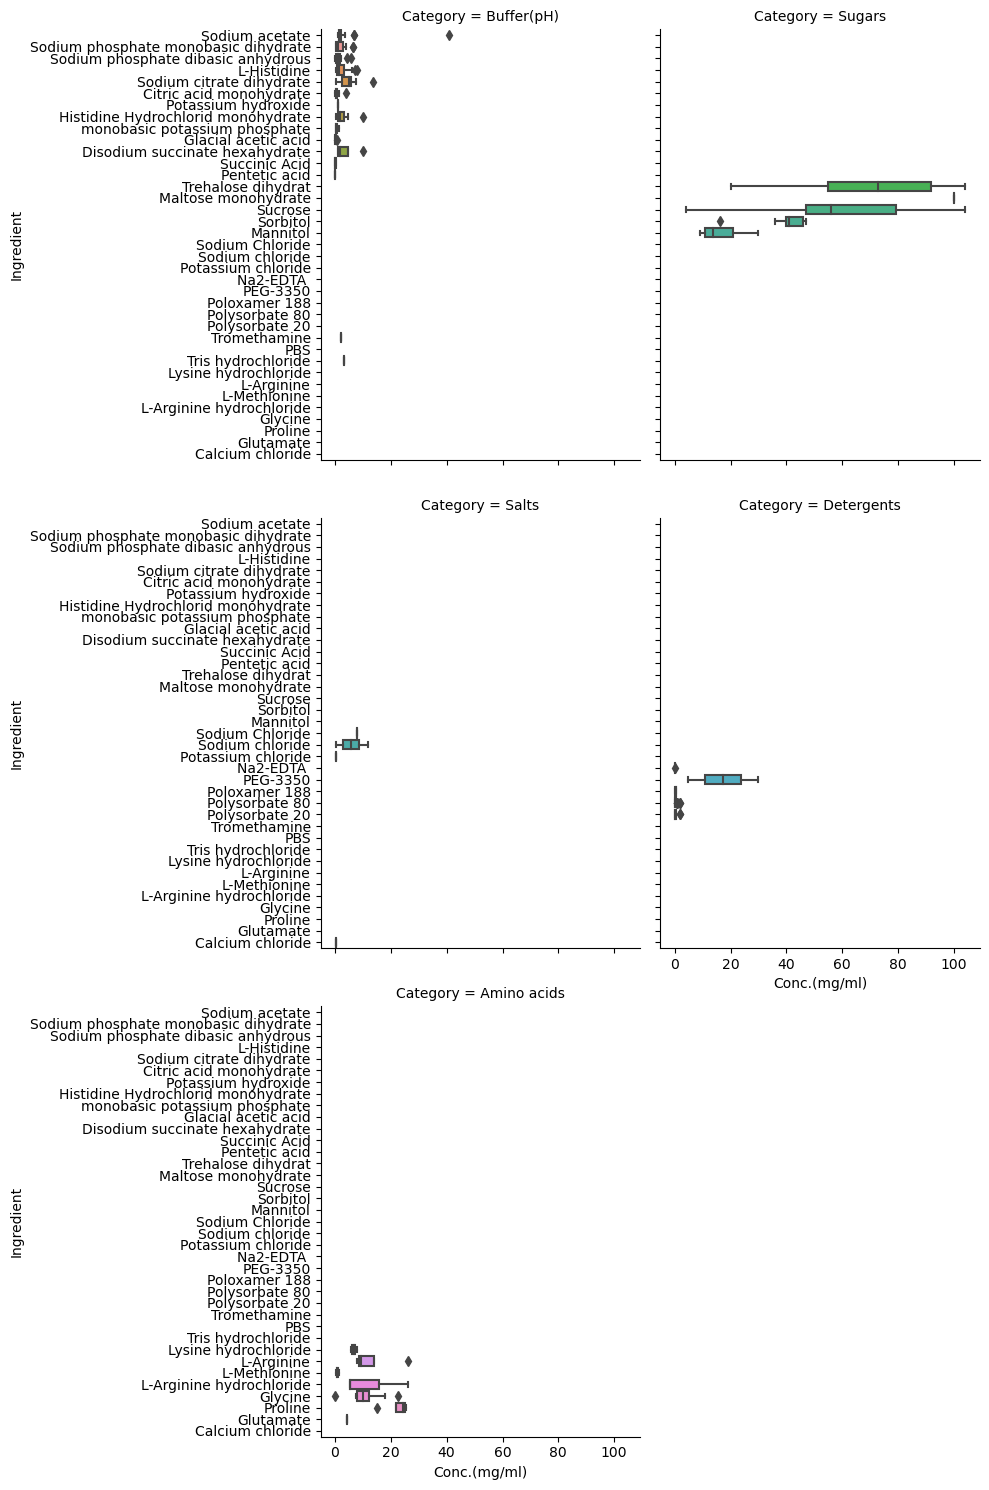

In [65]:
sns.catplot(
    data=df, x='Conc.(mg/ml)', y='Ingredient',
    col='Category', kind='box', col_wrap=2
)

In [66]:
df['Category'].unique()

array(['Buffer(pH)', 'Sugars', 'Salts', 'Detergents', 'Amino acids'],
      dtype=object)

<AxesSubplot:xlabel='Conc.(mg/ml)', ylabel='Ingredient'>

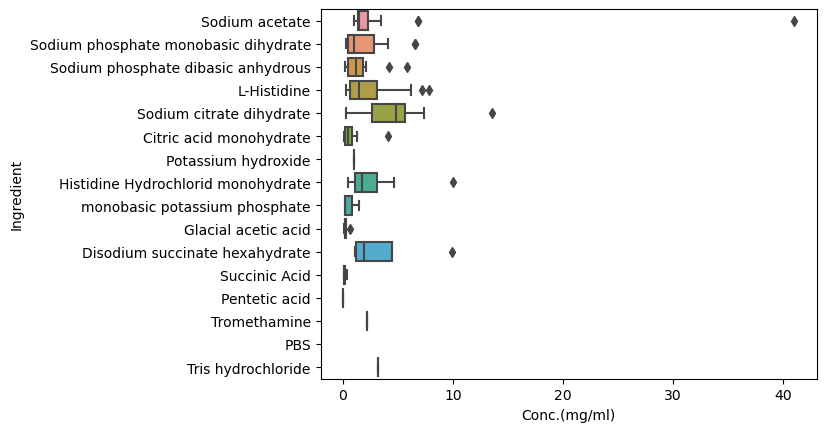

In [68]:
sns.boxplot(x='Conc.(mg/ml)', y='Ingredient', data=df[df['Category']=='Buffer(pH)'])

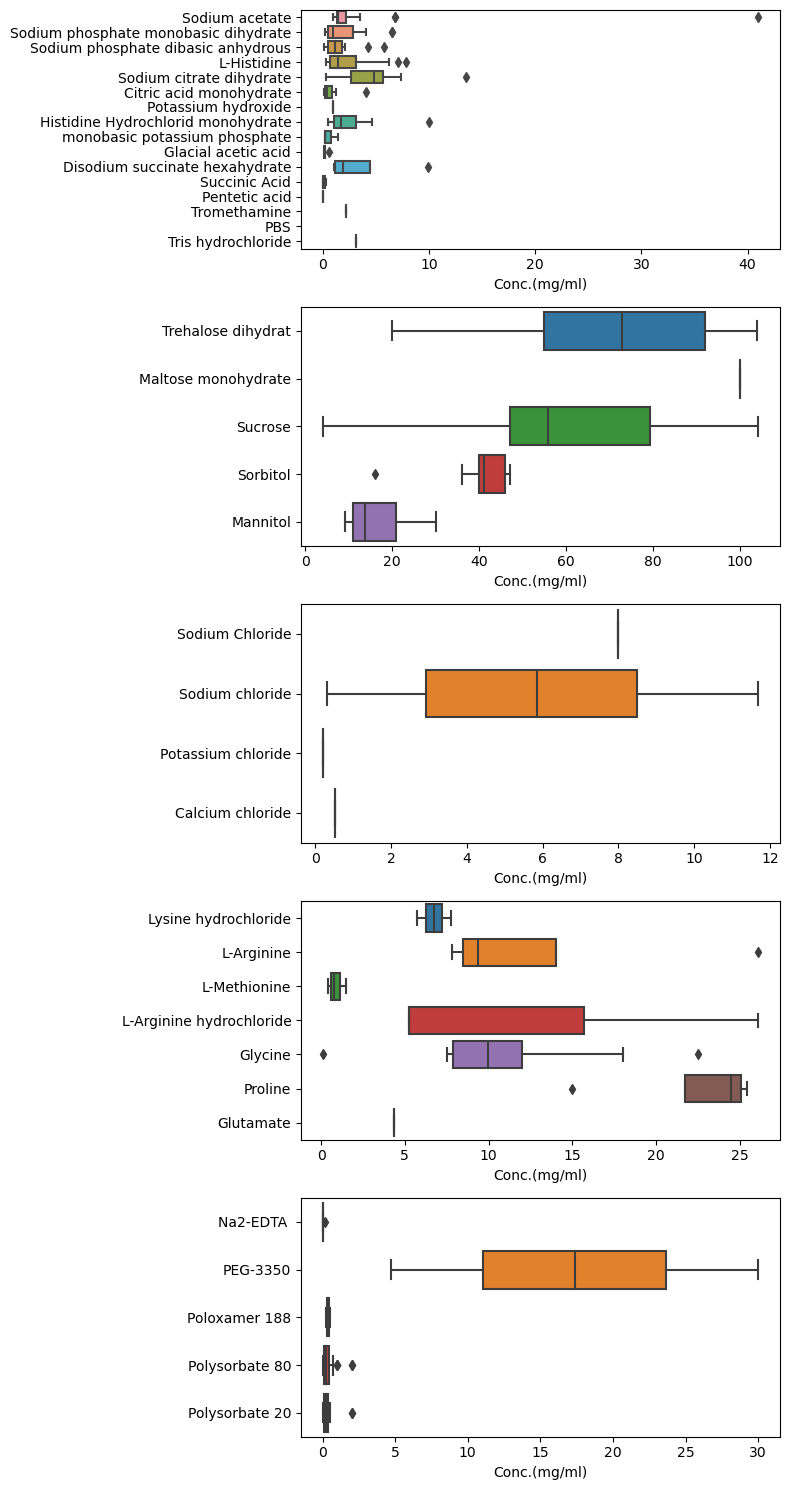

In [89]:
fig , axes = plt.subplots(nrows=5 ,ncols=1,
                          figsize=(8,15) )
ax = axes.flatten()

sns.boxplot(x='Conc.(mg/ml)', y='Ingredient', data=df[df['Category']=='Buffer(pH)'], ax=ax[0])

sns.boxplot(x='Conc.(mg/ml)', y='Ingredient', data=df[df['Category']=='Sugars'], ax=ax[1])
sns.boxplot(x='Conc.(mg/ml)', y='Ingredient', data=df[df['Category']=='Salts'], ax=ax[2])
sns.boxplot(x='Conc.(mg/ml)', y='Ingredient', data=df[df['Category']=='Amino acids'], ax=ax[3])
sns.boxplot(x='Conc.(mg/ml)', y='Ingredient', data=df[df['Category']=='Detergents'], ax=ax[4])

#hide ylabel
for i in ax:
    i.set(ylabel=None)
    
plt.tight_layout()